In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gradient Descent

$
W^{t+1} \leftarrow W^{t} - \eta \frac{df(\theta)}{d\theta}
$

In [3]:
def gradientDescent(x_init, epochs, lr, stop_thershold):
    
    x_gd = [x_init]
    y_gd = [func(x_init)]
    w = x_init

    for t in range(epochs):
        loss = (func(x_gd[t] + dx) - func(x_gd[t])) / dx
        w = w - lr * loss

        x_gd.append(w)
        y_gd.append(func(w))
    
        if (loss < stop_thershold):
            break

    return (x_gd, y_gd)


In [9]:
def trainFunc(x0, x1, size, func, funcName, strategy, *args, **kwargs):
    # set data
    x_data = np.linspace(x0, x1, size)
    y_data = func(x_data)
    dx = np.abs(x_data[1] - x_data[0])
    
    # train
    (x_gd, y_gd) = strategy(*args, **kwargs)

    plt.plot(x_data, y_data, color="blue", label=funcName)
    plt.plot(x_gd, y_gd, color="red", linestyle="dashed", label=funcName)
    plt.scatter(x_gd[0], y_gd[0], label="initial point")
    plt.scatter(x_gd[-1], y_gd[-1], label="final point")
    plt.grid(linestyle='--')
    #plt.xlim(-6, 6)
    #plt.ylim(-1, 30)
    plt.legend()
    plt.show()

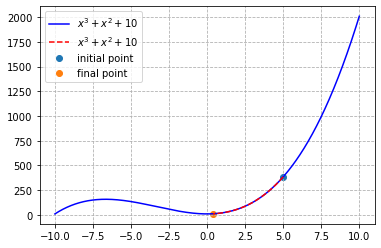

In [10]:
# set argument
x0 = -10
x1 = 10
size = 10000
func = lambda x : x**3 + 10*x**2 + 10
funcName = r"$x^3+x^2+10$"

# for train
x_init = 5
epochs = 100
lr = 0.001
stop_thershold = 0.01

trainFunc(x0, x1, size, func, funcName, gradientDescent, x_init, epochs, lr, stop_thershold)